In [1]:
import sys
sys.path.append("/Users/edouglas/github/dtcwt/tests/")  # or .insert(0, YOUR_PATH) may give higher priority

Maximum reconstruction error: 5.329070518200751e-15


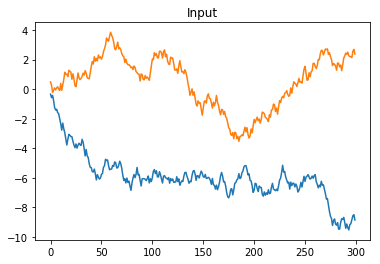

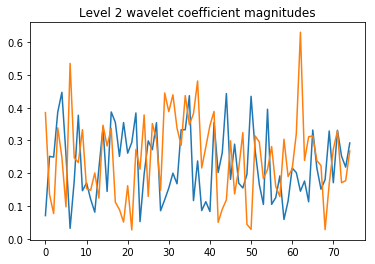

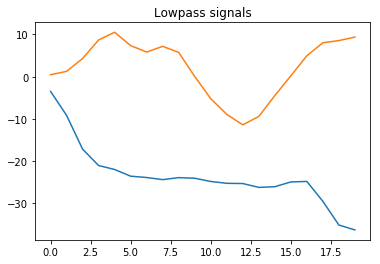

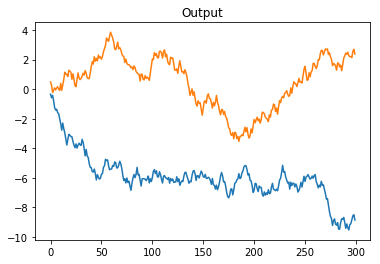

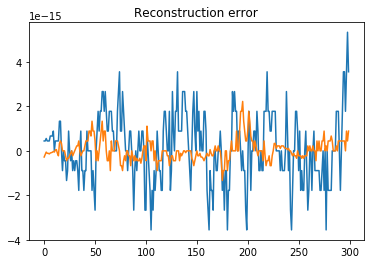

In [2]:
from matplotlib.pylab import *
from scipy.ndimage.interpolation import zoom
import astropy.convolution as conv


%matplotlib inline
import dtcwt
# Generate a 300x2 array of a random walk
vecs = np.cumsum(np.random.rand(300,2) - 0.5, 0)
# Show input
figure()
plot(vecs)
title('Input')
# 1D transform, 5 levels
transform = dtcwt.Transform1d()
vecs_t = transform.forward(vecs, nlevels=5)
# Show level 2 highpass coefficient magnitudes
figure()
plot(np.abs(vecs_t.highpasses[1]))
title('Level 2 wavelet coefficient magnitudes')
# Show last level lowpass image
figure()
plot(vecs_t.lowpass)
title('Lowpass signals')
# Inverse
vecs_recon = transform.inverse(vecs_t)
# Show output
figure()
plot(vecs_recon)
title('Output')
# Show error
figure()
plot(vecs_recon - vecs)
title('Reconstruction error')
print('Maximum reconstruction error: {0}'.format(np.max(np.abs(vecs - vecs_recon))))

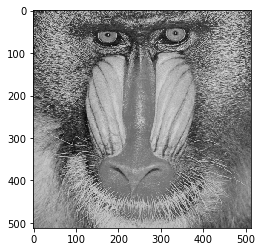

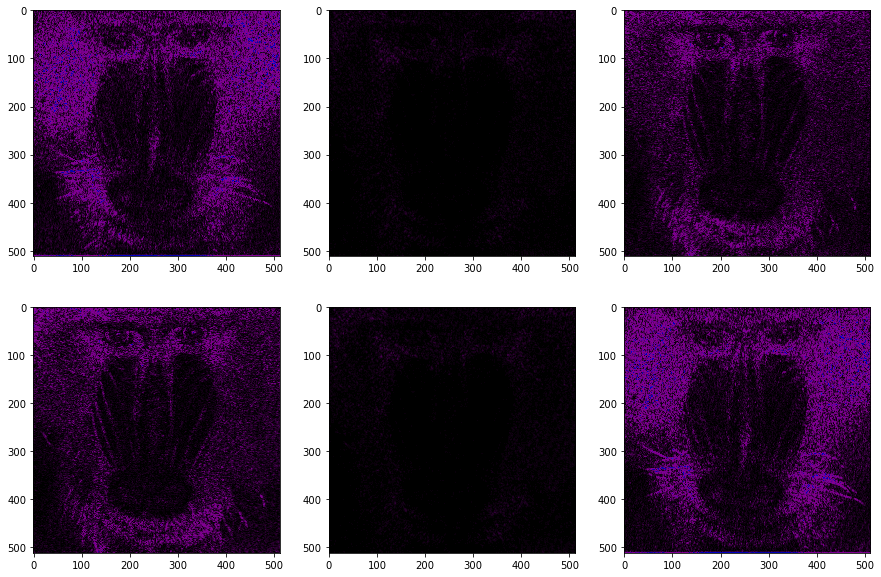

In [3]:
# Load the mandrill image
import datasets
import dtcwt


mandrill = datasets.mandrill()

# Show mandrill
figure(1)
imshow(mandrill, cmap=cm.gray, clim=(0,1))
transform = dtcwt.Transform2d()
# Compute two levels of dtcwt with the default wavelet family
mandrill_t = transform.forward(zoom(mandrill,4), nlevels=4)
# Show the absolute images for each direction in level 2.
# Note that the 2nd level has index 1 since the 1st has index 0.
figure(2,figsize=[15,10])
for slice_idx in range(mandrill_t.highpasses[1].shape[2]):
    subplot(2, 3, int(slice_idx+1))
    imshow(np.abs(mandrill_t.highpasses[1][:,:,slice_idx]), cmap=cm.spectral, clim=(0,1))

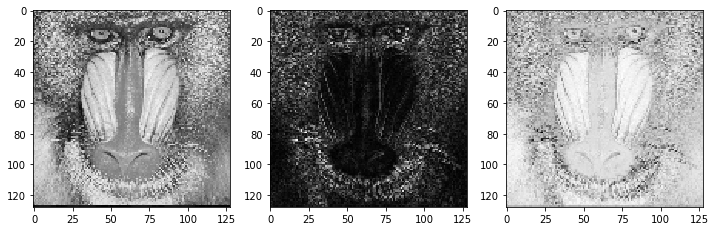

In [4]:
plt.figure(figsize=[12,5])
plt.subplot(131)
imshow(zoom(mandrill,1/4), cmap=cm.gray)#, clim=(0,1))
plt.subplot(132)
imshow(np.abs(np.max(mandrill_t.highpasses[3][:,:,:],axis=2)), cmap=cm.gray)#, clim=(0,1))
plt.subplot(133)
imshow(zoom(mandrill,1/4)-np.abs(np.max(mandrill_t.highpasses[3][:,:,:],axis=2)), cmap=cm.gray)#, clim=(0,1))

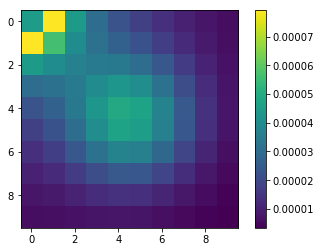

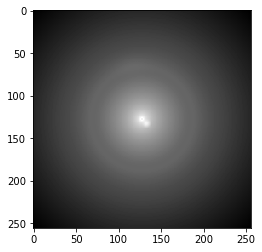

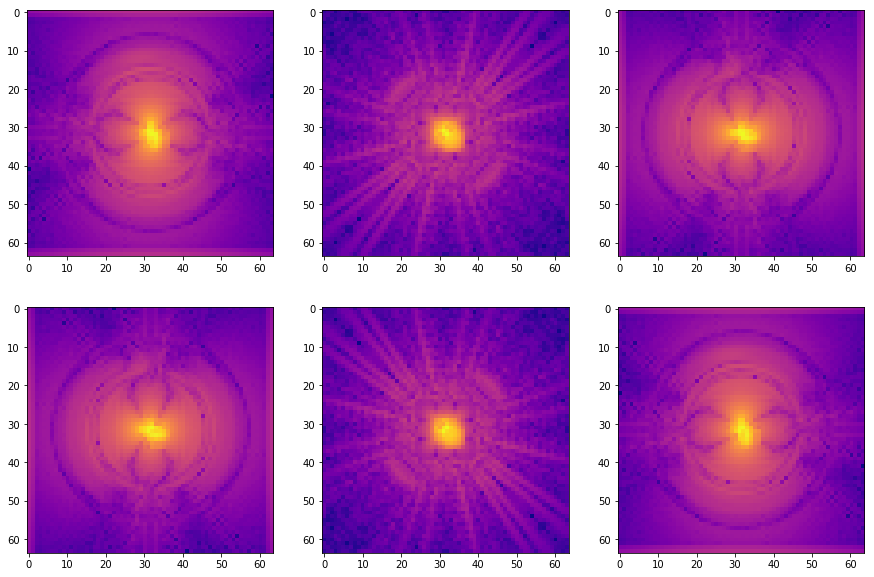

In [5]:
# Load the mandrill image
import datasets
import matplotlib as mpl
import astropy.io.fits as fits

from os.path import expanduser
home = expanduser("~")
zodipic_array= fits.getdata(home+"/githubMIT/WFIRST/dust_detection/zodipic.fits")
zodi_npix= zodipic_array.shape[0]
subreg=zodipic_array[int(zodi_npix/2):int(zodi_npix/2)+10,int(zodi_npix/2):int(zodi_npix/2)+10]
subreg += conv.Gaussian2DKernel(2,x_size=10,y_size=10).array*1e-3
plt.figure(0)
plt.imshow(zodipic_array[int(zodi_npix/2):int(zodi_npix/2)+10,int(zodi_npix/2):int(zodi_npix/2)+10])
plt.colorbar()
mandrill = zodipic_array[128:256+128,128:256+128]


# Show mandrill
figure(1)
imshow(mandrill, cmap=cm.gray,norm=mpl.colors.LogNorm())#, clim=(0,1))
transform = dtcwt.Transform2d()
# Compute two levels of dtcwt with the defaul wavelet family
mandrill_t = transform.forward(mandrill, nlevels=2)
# Show the absolute images for each direction in level 2.
# Note that the 2nd level has index 1 since the 1st has index 0.
figure(2,figsize=[15,10])
for slice_idx in range(mandrill_t.highpasses[1].shape[2]):
    subplot(2, 3, int(slice_idx+1))
    imshow(np.abs(mandrill_t.highpasses[1][:,:,slice_idx]), 
           cmap=cm.plasma, norm=mpl.colors.LogNorm())#, clim=(0,1))

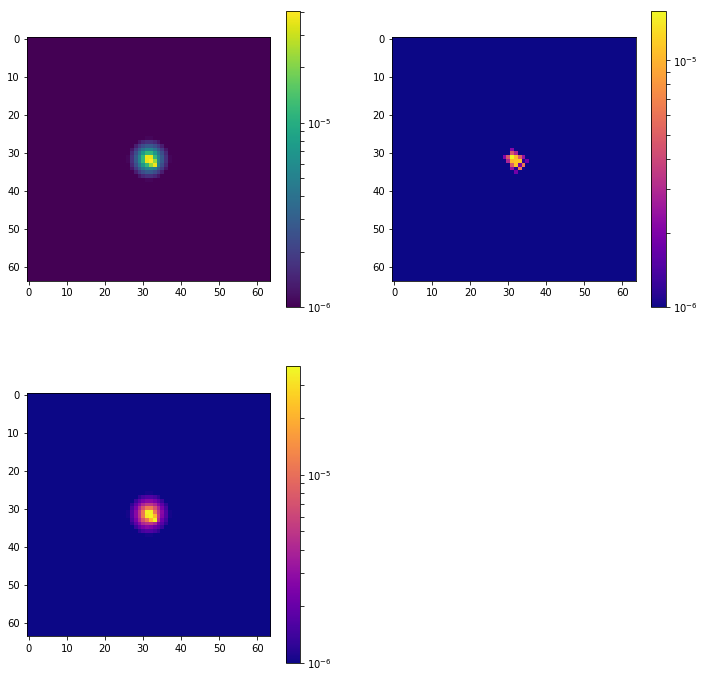

In [40]:
plt.figure(figsize=[12,12])
plt.subplot(221)
imshow(zoom(mandrill,1/4),#[50:75,50:75], 
       norm=mpl.colors.LogNorm(1e-6),
       cmap=cm.viridis)#, clim=(0,1))
plt.colorbar()
plt.subplot(222)
imshow(np.abs(np.max(mandrill_t.highpasses[1][:,:,:],axis=2)),#[50:75,50:75],
       norm=mpl.colors.LogNorm(1e-6),
       cmap=cm.plasma)#, clim=(0,1))
plt.colorbar()

plt.subplot(223)
imshow((zoom(mandrill,1/4)-0.5*np.abs(np.mean(mandrill_t.highpasses[1][:,:,:],axis=2))),#[50:75,50:75],
       norm=mpl.colors.LogNorm(1e-6),
       cmap=cm.plasma)#, clim=(0,1))

plt.colorbar()

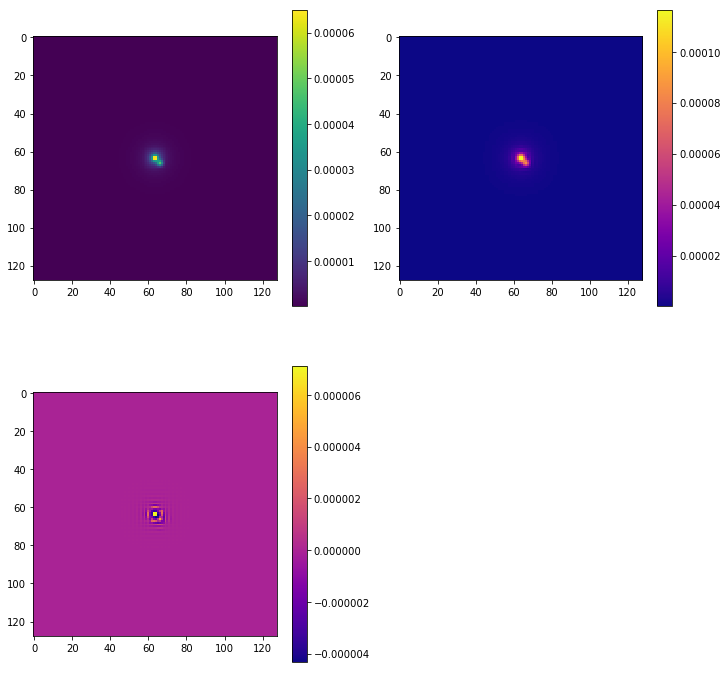

In [39]:
from dtcwt import compat
#dtcwt.compat.dtwavexfm2(X, nlevels=3, biort='near_sym_a', qshift='qshift_a', include_scale=False)
#plt.imshow(zoom(mandrill,1/4))#-dtcwt.compat.dtwavexfm2(mandrill,nlevels=3)[0])#[50:75,50:75])
plt.figure(figsize=[12,12])
plt.subplot(221)
imshow(zoom(mandrill,1/2,order=1),#[50:75,50:75], 
       #norm=mpl.colors.SymLogNorm(1e-8,vmin=0,vmax=1e-4),



       cmap=cm.viridis)#, clim=(0,1))
plt.colorbar()
plt.subplot(222)
imshow(dtcwt.compat.dtwavexfm2(mandrill,nlevels=2)[0],#[50:75,50:75],
       #norm=mpl.colors.SymLogNorm(1e-8,vmin=0,vmax=1e-4),

       cmap=cm.plasma)#, clim=(0,1))
plt.colorbar()

plt.subplot(223)
imshow(zoom(mandrill,1/2,order=1)-0.5*dtcwt.compat.dtwavexfm2(mandrill,nlevels=2)[0],#[50:75,50:75],
       #norm=mpl.colors.SymLogNorm(1e-8,vmin=-1e-4,vmax=1e-4),
       cmap=cm.plasma)#, clim=(0,1))

plt.colorbar()

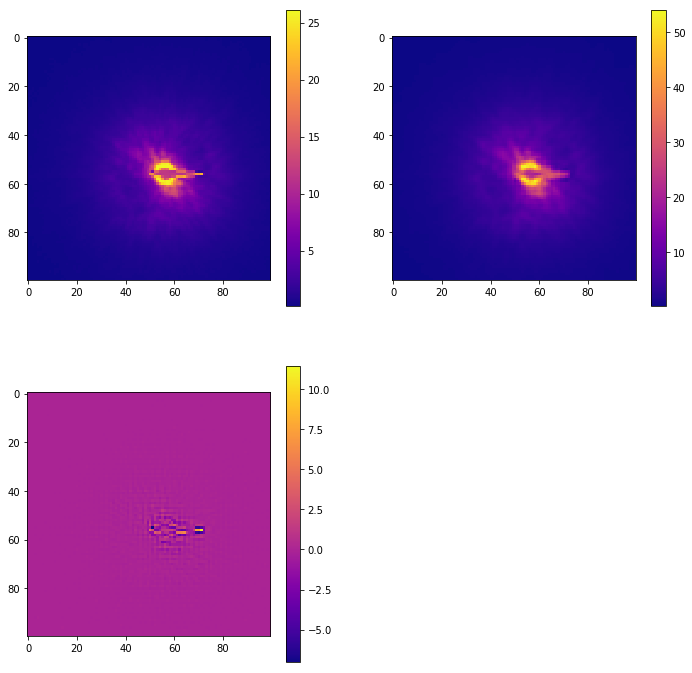

In [38]:
from dtcwt import compat
#dtcwt.compat.dtwavexfm2(X, nlevels=3, biort='near_sym_a', qshift='qshift_a', include_scale=False)
#plt.imshow(zoom(mandrill,1/4))#-dtcwt.compat.dtwavexfm2(mandrill,nlevels=3)[0])#[50:75,50:75])
plt.figure(figsize=[12,12])
plt.subplot(221)
magao=fits.getdata("/Users/edouglas/Dropbox (MIT)/projects/MagAO/2017B_MagAO_data/reduced_data/VisAObelow115nm/V47_20170831074149749196_red.fits")
magao=magao[400:600,400:600]

imshow(zoom(magao,1/2,order=1),#[50:75,50:75], 
       #norm=mpl.colors.SymLogNorm(1e-8,vmin=0,vmax=1e-4),



       cmap=cm.plasma)#, clim=(0,1))
plt.colorbar()
plt.subplot(222)
imshow(dtcwt.compat.dtwavexfm2(magao,nlevels=2)[0],#[50:75,50:75],
       #norm=mpl.colors.SymLogNorm(1e-8,vmin=0,vmax=1e-4),

       cmap=cm.plasma)#, clim=(0,1))
plt.colorbar()

plt.subplot(223)
imshow(zoom(magao,1/2,order=1)-0.5*dtcwt.compat.dtwavexfm2(magao,nlevels=2)[0],#[50:75,50:75],
       #norm=mpl.colors.SymLogNorm(1e-8,vmin=-1e-4,vmax=1e-4),
       cmap=cm.plasma)#, clim=(0,1))

plt.colorbar()

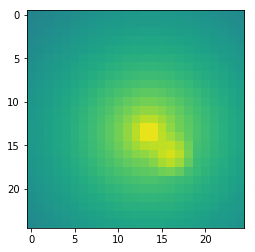

In [8]:
imshow(zoom(mandrill,1/2,order=3)[50:75,50:75], 
       norm=mpl.colors.SymLogNorm(1e-8,vmin=0,vmax=1e-4),)




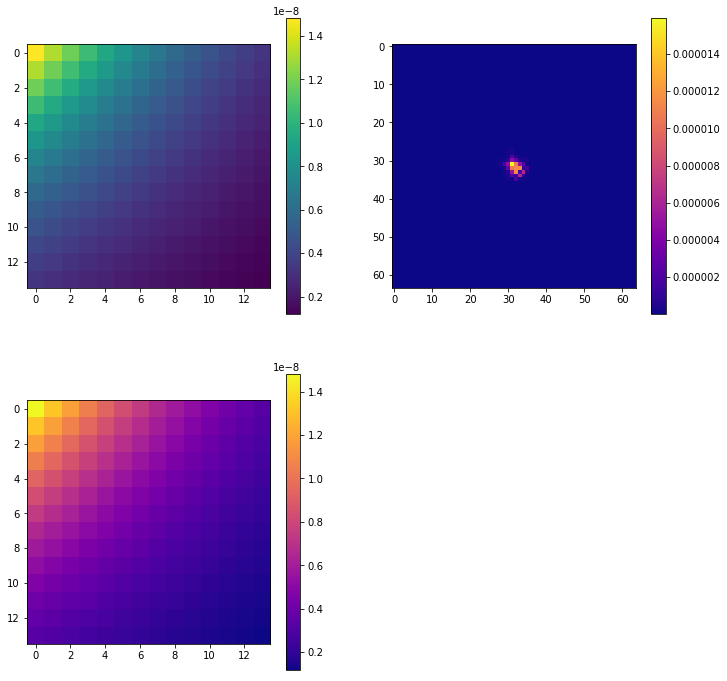

In [9]:
plt.figure(figsize=[12,12])
plt.subplot(221)
imshow(zoom(mandrill,1/4)[50:75,50:75], 
      # norm=mpl.colors.LogNorm(1e-6),
       cmap=cm.viridis)#, clim=(0,1))
plt.colorbar()
plt.subplot(222)
imshow(np.abs(np.max(mandrill_t.highpasses[1][:,:,:],axis=2)),#[50:75,50:75],
     #  norm=mpl.colors.LogNorm(1e-6),
       cmap=cm.plasma)#, clim=(0,1))
plt.colorbar()

plt.subplot(223)
imshow((zoom(mandrill,1/4)-np.abs(np.mean(mandrill_t.highpasses[1][:,:,:],axis=2)))[50:75,50:75],
       #norm=mpl.colors.LogNorm(1e-6),
       cmap=cm.plasma)#, clim=(0,1))

plt.colorbar()

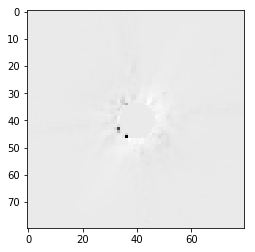

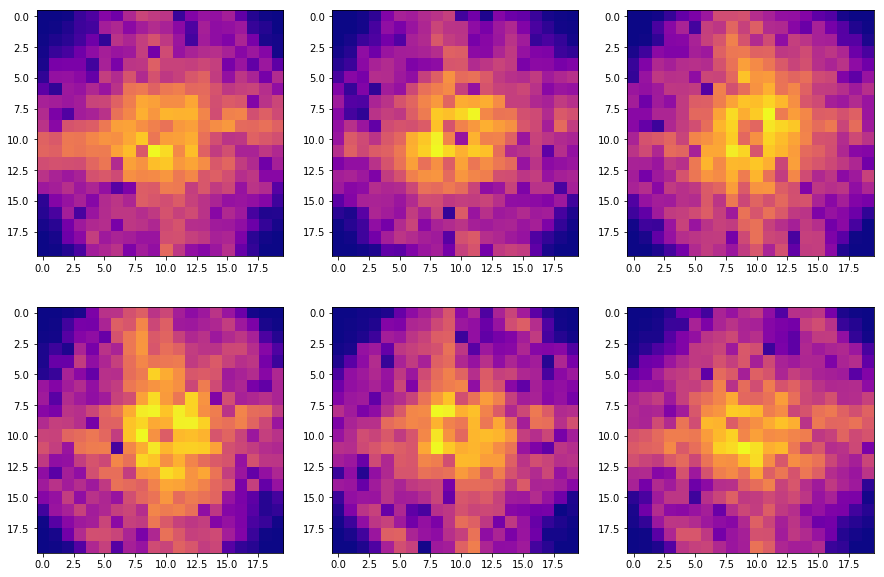

In [10]:
# Load the mandrill image
import datasets
import matplotlib as mpl
import astropy.io.fits as fits

from os.path import expanduser
home = expanduser("~")

betapic_rolls = fits.open(home+"/githubMIT/WFIRST/dust_detection/hlsp_alice_hst_nicmos_7248-beta-pic-disk_f110w_v1_multi-roll (2).fits")#[:,:,0]
bpic=betapic_rolls[2].data[0] - betapic_rolls[2].data[0].min()
# Show mandrill
figure(1)
imshow(bpic, cmap=cm.gray,norm=mpl.colors.SymLogNorm(1))#, clim=(0,1))
import dtcwt
transform = dtcwt.Transform2d()
# Compute two levels of dtcwt with the defaul wavelet family
betapic_rolls_t = transform.forward(bpic, nlevels=2)
# Show the absolute images for each direction in level 2.
# Note that the 2nd level has index 1 since the 1st has index 0.
figure(2,figsize=[15,10])
for slice_idx in range(betapic_rolls_t.highpasses[1].shape[2]):
    subplot(2, 3, int(slice_idx+1))
    imshow(np.abs(betapic_rolls_t.highpasses[1][:,:,slice_idx]), 
           cmap=cm.plasma, norm=mpl.colors.SymLogNorm(1))#, clim=(0,1))

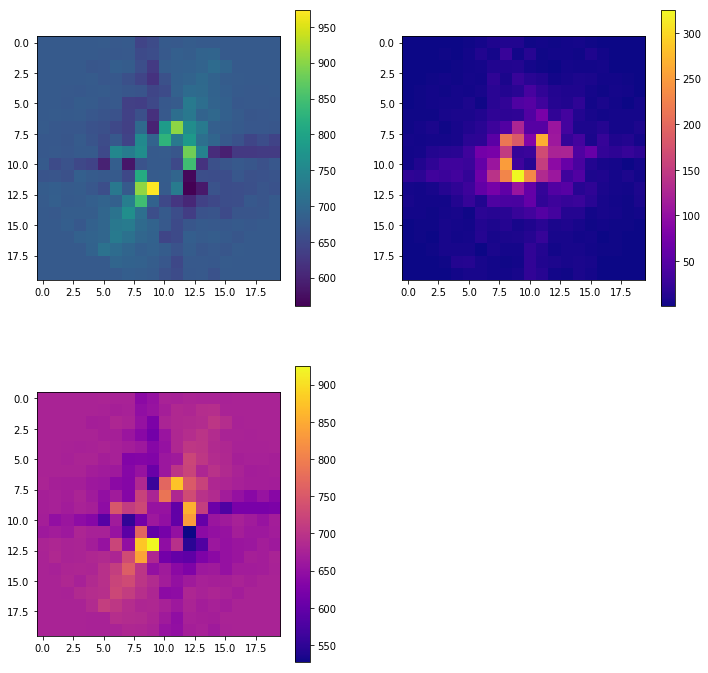

In [11]:
plt.figure(figsize=[12,12])
plt.subplot(221)
imshow(zoom(bpic,1/4), 
       #norm=mpl.colors.LogNorm(1),
       cmap=cm.viridis)#, clim=(0,1))
plt.colorbar()
plt.subplot(222)
imshow(np.abs(np.max(betapic_rolls_t.highpasses[1][:,:,:],axis=2)),
       #norm=mpl.colors.LogNorm(),
       cmap=cm.plasma)#, clim=(0,1))
plt.colorbar()

plt.subplot(223)
imshow(zoom(bpic,1/4)-np.abs(np.mean(betapic_rolls_t.highpasses[1][:,:,:],axis=2)),
       #norm=mpl.colors.LogNorm(1e-8),
       cmap=cm.plasma)#, clim=(0,1))

plt.colorbar()



/Users/edouglas/anaconda/envs/astroconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


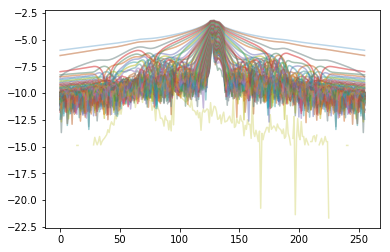

In [12]:
from numpy import fft
plt.plot(np.log10(np.abs(fft.fft(mandrill))),alpha=0.3)

Estimated Gaussian noise standard deviation = 9.120818701253186e-09


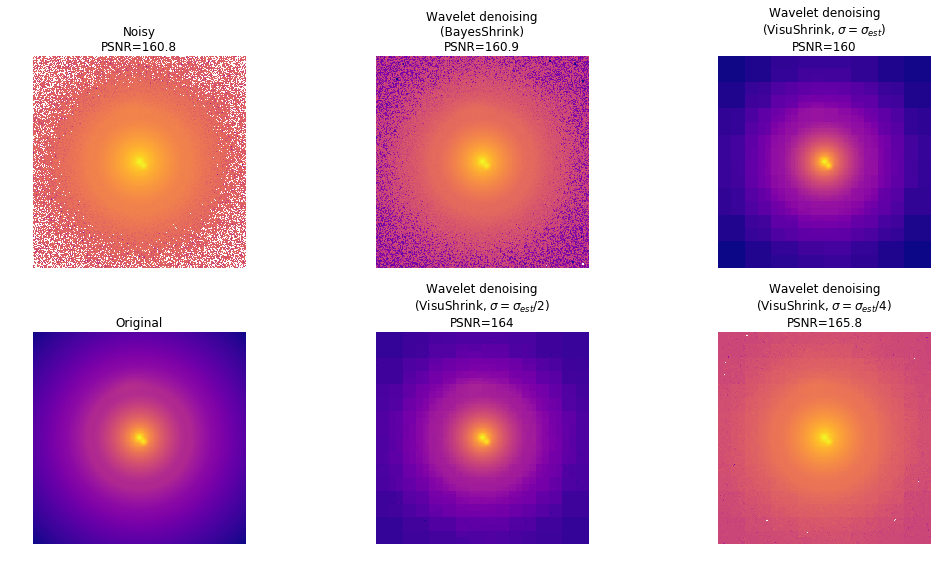

In [14]:
#http://scikit-image.org/docs/dev/auto_examples/filters/plot_denoise_wavelet.html?highlight=wavelet
#this only works with scikit-image 0.14dev (or greater presumably)
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.measure import compare_psnr


original = np.float_(mandrill)#img_as_float(data.chelsea()[100:250, 50:300])

sigma = 1e-8
noisy = (random_noise(original, var=sigma**2))

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharex=True,
                       sharey=True, subplot_kw={'adjustable': 'box-forced'})

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print("Estimated Gaussian noise standard deviation = {}".format(sigma_est))

im_bayes = denoise_wavelet(noisy, multichannel=False, convert2ycbcr=True,
                           method='BayesShrink', mode='soft')
im_visushrink = denoise_wavelet(noisy, multichannel=False, convert2ycbcr=True,
                                method='VisuShrink', mode='soft',
                                sigma=sigma_est)

# VisuShrink is designed to eliminate noise with high probability, but this
# results in a visually over-smooth appearance.  Repeat, specifying a reduction
# in the threshold by factors of 2 and 4.
im_visushrink2 = denoise_wavelet(noisy, multichannel=False, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/2)
im_visushrink4 = denoise_wavelet(noisy, multichannel=False, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/4)

# Compute PSNR as an indication of image quality
psnr_noisy = compare_psnr(original, noisy)
psnr_bayes = compare_psnr(original, im_bayes)
psnr_visushrink = compare_psnr(original, im_visushrink)
psnr_visushrink2 = compare_psnr(original, im_visushrink2)
psnr_visushrink4 = compare_psnr(original, im_visushrink4)

ax[0, 0].imshow(noisy,           cmap=cm.plasma, norm=mpl.colors.LogNorm())
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy\nPSNR={:0.4g}'.format(psnr_noisy))
ax[0, 1].imshow(im_bayes,           cmap=cm.plasma, norm=mpl.colors.LogNorm())
ax[0, 1].axis('off')
ax[0, 1].set_title(
    'Wavelet denoising\n(BayesShrink)\nPSNR={:0.4g}'.format(psnr_bayes))
ax[0, 2].imshow(im_visushrink,           cmap=cm.plasma, norm=mpl.colors.LogNorm())
ax[0, 2].axis('off')
ax[0, 2].set_title(
    ('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}$)\n'
     'PSNR=%0.4g' % psnr_visushrink))
ax[1, 0].imshow(original,           cmap=cm.plasma, norm=mpl.colors.LogNorm())
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')
ax[1, 1].imshow(im_visushrink2,           cmap=cm.plasma, norm=mpl.colors.LogNorm())
ax[1, 1].axis('off')
ax[1, 1].set_title(
    ('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}/2$)\n'
     'PSNR=%0.4g' % psnr_visushrink2))
ax[1, 2].imshow(im_visushrink4,           cmap=cm.plasma, norm=mpl.colors.LogNorm())
ax[1, 2].axis('off')
ax[1, 2].set_title(
    ('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}/4$)\n'
     'PSNR=%0.4g' % psnr_visushrink4))
fig.tight_layout()

plt.show()

Estimated Gaussian noise standard deviation = 0.003143963508087773


/Users/edouglas/github/scikit-image/skimage/measure/simple_metrics.py:151: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


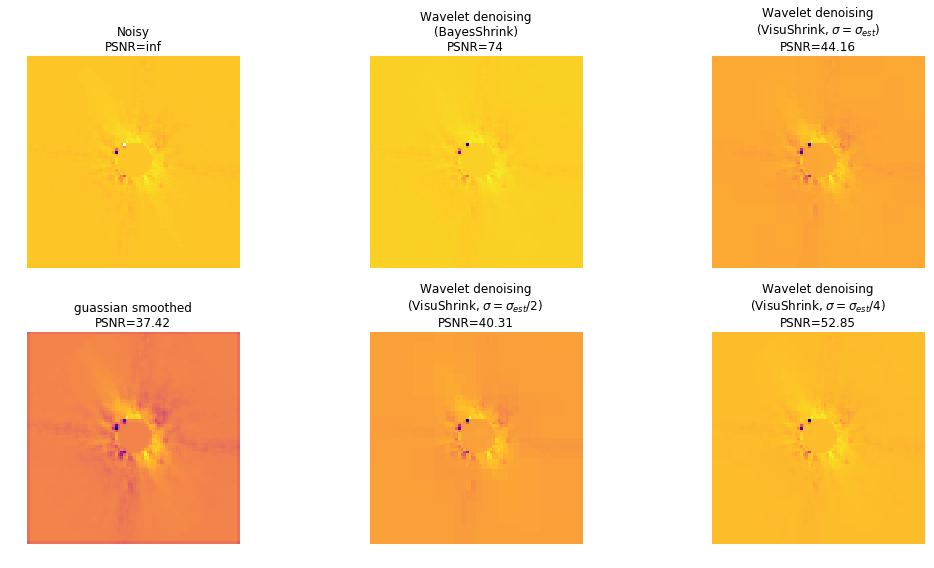

In [26]:


original = np.float_(bpic/bpic.max())#img_as_float(data.chelsea()[100:250, 50:300])

#sigma = 1e-8
noisy = np.float_(bpic/bpic.max())#(random_noise(original, var=sigma**2))

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharex=True,
                       sharey=True, subplot_kw={'adjustable': 'box-forced'})

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print("Estimated Gaussian noise standard deviation = {}".format(sigma_est))

im_bayes = denoise_wavelet(noisy, multichannel=False, #convert2ycbcr=F,
                           method='BayesShrink', mode='soft')
im_visushrink = denoise_wavelet(noisy, multichannel=False, convert2ycbcr=True,
                                method='VisuShrink', mode='soft',
                                sigma=sigma_est)

# VisuShrink is designed to eliminate noise with high probability, but this
# results in a visually over-smooth appearance.  Repeat, specifying a reduction
# in the threshold by factors of 2 and 4.
im_visushrink2 = denoise_wavelet(noisy, multichannel=False,# convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est*2)
im_visushrink4 = denoise_wavelet(noisy, multichannel=False, #convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/4)

# Compute PSNR as an indication of image quality
psnr_noisy = compare_psnr(original, noisy)
psnr_bayes = compare_psnr(original, im_bayes)
psnr_visushrink = compare_psnr(original, im_visushrink)
psnr_visushrink2 = compare_psnr(original, im_visushrink2)
psnr_visushrink4 = compare_psnr(original, im_visushrink4)

ax[0, 0].imshow(noisy,           cmap=cm.plasma, norm=mpl.colors.LogNorm())
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy\nPSNR={:0.4g}'.format(psnr_noisy))
ax[0, 1].imshow(im_bayes,           cmap=cm.plasma, norm=mpl.colors.LogNorm())
ax[0, 1].axis('off')
ax[0, 1].set_title(
    'Wavelet denoising\n(BayesShrink)\nPSNR={:0.4g}'.format(psnr_bayes))
ax[0, 2].imshow(im_visushrink,           cmap=cm.plasma, norm=mpl.colors.LogNorm())
ax[0, 2].axis('off')
ax[0, 2].set_title(
    ('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}$)\n'
     'PSNR=%0.4g' % psnr_visushrink))
smoothed=conv.convolve_fft(noisy, conv.Gaussian2DKernel(0.5))
ax[1, 0].imshow(smoothed,cmap=cm.plasma, norm=mpl.colors.LogNorm(),origin="upper left")
ax[1, 0].axis('off')
ax[1, 0].set_title(
    ('guassian smoothed\n'
     'PSNR=%0.4g' % compare_psnr(original, smoothed)))
ax[1, 1].imshow(im_visushrink2,           cmap=cm.plasma, norm=mpl.colors.LogNorm(),origin="upper left")
ax[1, 1].axis('off')
ax[1, 1].set_title(
    ('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}/2$)\n'
     'PSNR=%0.4g' % psnr_visushrink2))
ax[1, 2].imshow(im_visushrink4,           cmap=cm.plasma, norm=mpl.colors.LogNorm(),origin="upper left")
ax[1, 2].axis('off')
ax[1, 2].set_title(
    ('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}/4$)\n'
     'PSNR=%0.4g' % psnr_visushrink4))
fig.tight_layout()

plt.show()

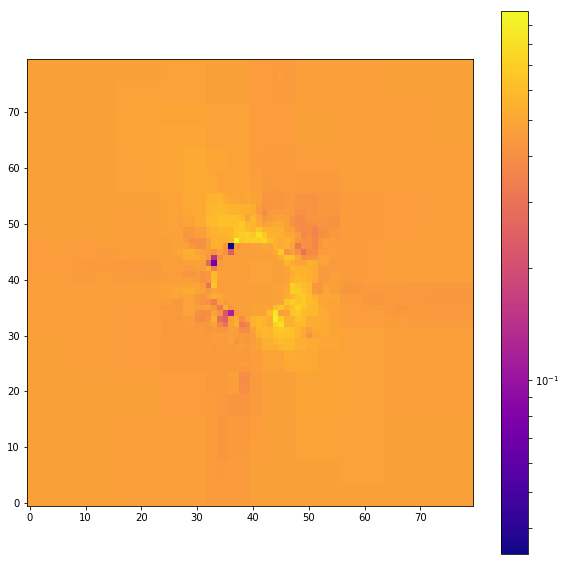

In [27]:
plt.figure(figsize=[10,10])
plt.imshow(im_visushrink2,           cmap=cm.plasma, norm=mpl.colors.LogNorm(),origin="upper left")
plt.colorbar()

INFO:root:Loading frames from "traffic"
INFO:root:Taking DTCWT
INFO:root:Finding flow
INFO:root:Computing warped image
INFO:root:Computing velocity field
INFO:root:Loading frames from "tennis"
INFO:root:Taking DTCWT
INFO:root:Finding flow
INFO:root:Computing warped image
INFO:root:Computing velocity field


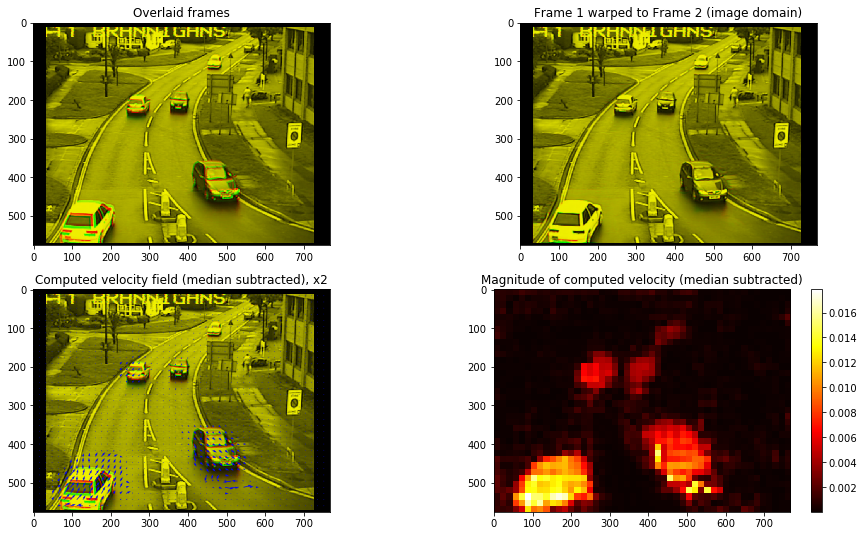

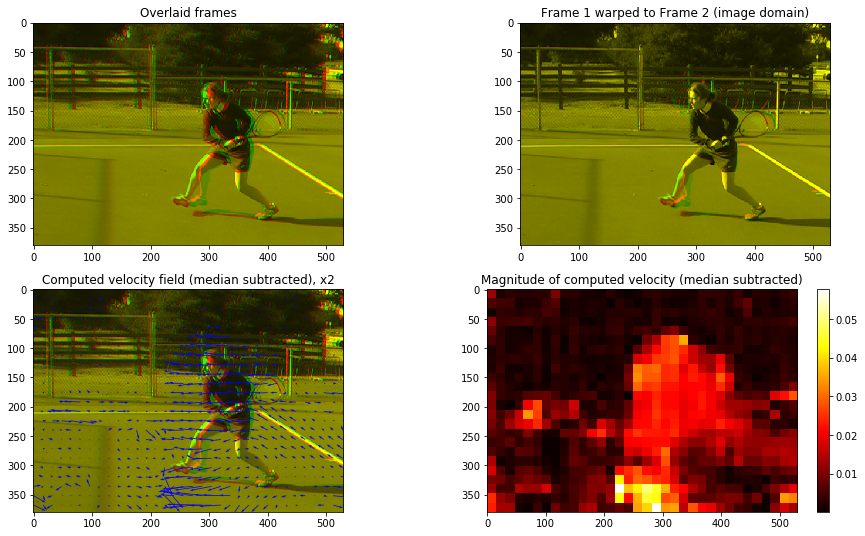

In [28]:
#!/usr/bin/env python
"""
An example of image registration via the DTCWT.

This script demonstrates some methods for image registration using the DTCWT.

"""

from __future__ import division, print_function

import itertools
import logging
import os

from matplotlib.pyplot import *
import numpy as np

import dtcwt
from dtcwt.numpy import Transform2d
import dtcwt.sampling
from dtcwt.registration import *

logging.basicConfig(level=logging.INFO)

import datasets

def register_frames(filename):
    # Load test images
    logging.info('Loading frames from "{0}"'.format(filename))
    f1, f2 = datasets.regframes(filename)

    # Take the DTCWT of both frames.
    logging.info('Taking DTCWT')
    nlevels = 6
    trans = Transform2d()
    t1 = trans.forward(f1, nlevels=nlevels)
    t2 = trans.forward(f2, nlevels=nlevels)

    # Solve for transform
    logging.info('Finding flow')
    avecs = estimatereg(t1, t2)

    logging.info('Computing warped image')
    warped_f1 = warp(f1, avecs, method='bilinear')

    logging.info('Computing velocity field')
    step = 16
    X, Y = np.meshgrid(np.arange(f1.shape[1]), np.arange(f1.shape[0]))
    vxs, vys = velocityfield(avecs, f1.shape, method='nearest')

    vxs -= np.median(vxs.flat)
    vys -= np.median(vys.flat)

    figure(figsize=(16,9))

    subplot(221)
    imshow(np.dstack((f1, f2, np.zeros_like(f1))))
    title('Overlaid frames')

    subplot(222)
    imshow(np.dstack((warped_f1, f2, np.zeros_like(f2))))
    title('Frame 1 warped to Frame 2 (image domain)')

    subplot(223)
    sc = 2
    imshow(np.dstack((f1, f2, np.zeros_like(f2))))
    quiver(X[::step,::step], Y[::step,::step],
            -sc*vxs[::step,::step]*f1.shape[1], -sc*vys[::step,::step]*f1.shape[0],
            color='b', angles='xy', scale_units='xy', scale=1)
    title('Computed velocity field (median subtracted), x{0}'.format(sc))

    subplot(224)
    imshow(np.sqrt(vxs*vxs + vys*vys), interpolation='none', cmap=cm.hot)
    colorbar()
    title('Magnitude of computed velocity (median subtracted)')

    # savefig(os.path.splitext(os.path.basename(filename))[0] + '-registration.png')

register_frames('traffic')
register_frames('tennis')
